In [2]:
%run Connection.ipynb

In [9]:
titanic = pd.read_sql('SELECT * FROM titanic', db_engine_t)
titanic = titanic.replace('', None)
titanic

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,None,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,None,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,None,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,None,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,None,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,None,S,0,10-4-1912


# 1

Sul database titanic, effettuiamo le seguenti analisi: 
* Riusciamo a calcolare quanti ponti c'erano sulla nave (prima lettera dei dati nella colonna Cabin)? 
* Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco (colonna PClass) 
* Fare la stessa cosa per la colonna Survived 
* Qual era la distribuzione delle tariffe (Fare)? 
* Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco con un boxplot? 
* Visualizziamo un boxplot rispetto alle colonne Fare e Survived; che cose ne deduciamo?

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   PClass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Survived     1309 non-null   int64  
 12  EmbarkDate   1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [10]:
titanic.dropna()

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86,E46,S,0,10-4-1912
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.70,G6,S,1,10-4-1912
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.55,C103,S,1,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.72,D40,C,0,11-4-1912
1296,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""""""",male,20.0,0,0,SC/PARIS 2166,13.86,D38,C,0,11-4-1912
1298,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.50,C80,C,0,11-4-1912
1302,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.00,C78,Q,1,11-4-1912


In [18]:
lista_cabine = []
for cabina in titanic.Cabin.dropna():
    lista_cabine.append(cabina[0])
#print(lista_cabine)
lista_cabine = set(lista_cabine)
lista_cabine

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

<Axes: xlabel='PClass', ylabel='count'>

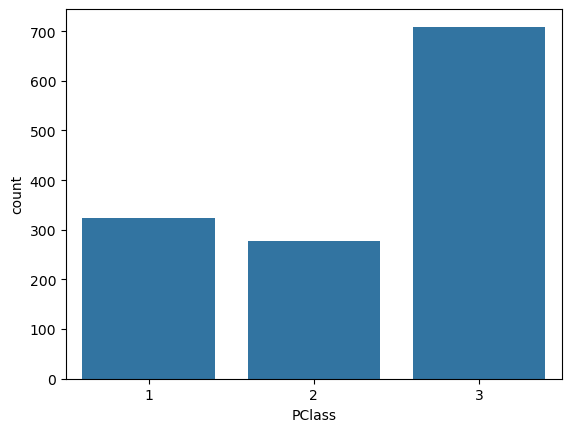

In [19]:
sns.countplot(data=titanic, x = 'PClass')

<Axes: xlabel='Survived', ylabel='count'>

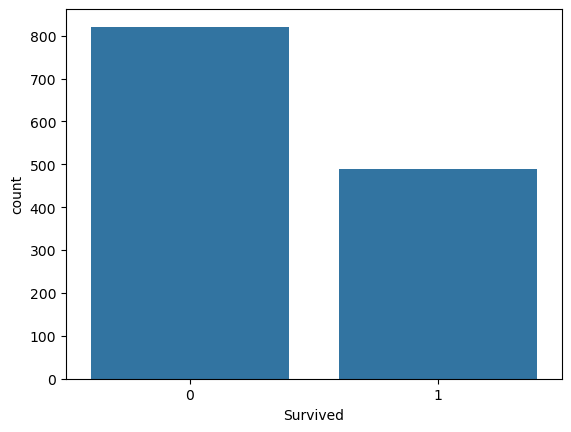

In [22]:
sns.countplot(data=titanic, x = 'Survived')


<Axes: xlabel='Fare', ylabel='Count'>

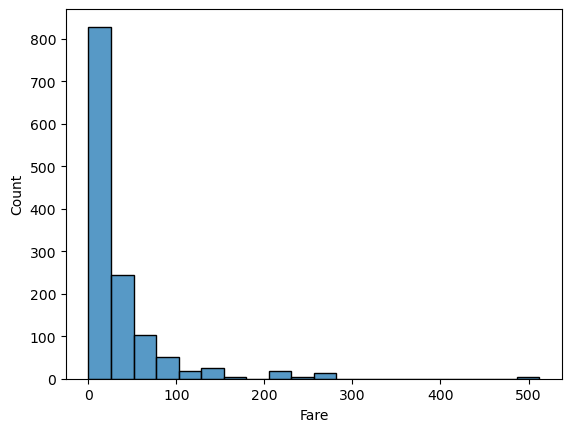

In [22]:
sns.histplot(data = titanic, x =  'Fare', bins = 20)

<Axes: xlabel='PClass', ylabel='Age'>

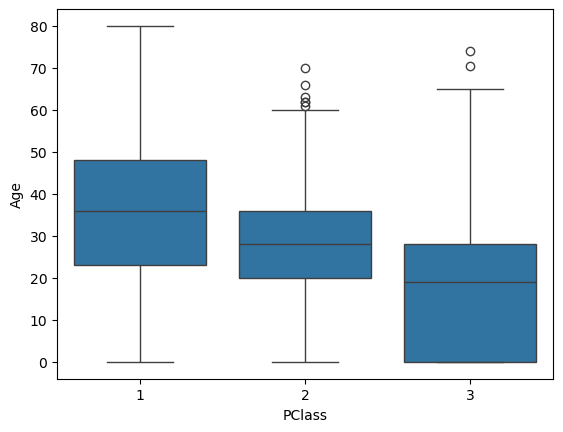

In [24]:
sns.boxplot(data = titanic, x = 'PClass', y = 'Age')

<Axes: xlabel='Survived', ylabel='Fare'>

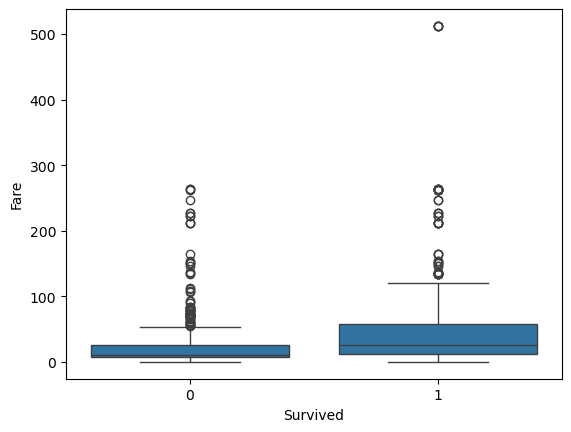

In [25]:
sns.boxplot(data = titanic, x = 'Survived', y = 'Fare')

# 2 

Scarichiamo il dataset stockdata.csv da https://github.com/plotly/datasets/blob/master/stockdata.csv e: • Visualizziamo l'andamento delle azioni della Apple ("AAPL") • Visualizziamo l'andamento di tutte le azioni del dataset • Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013 • Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso

In [24]:
stock = pd.read_csv('stockdata.csv')
stock.info()
stock.describe()
stock

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2306 non-null   float64
 1   IBM     2306 non-null   float64
 2   SBUX    2306 non-null   float64
 3   AAPL    2306 non-null   float64
 4   GSPC    2306 non-null   float64
 5   Date    2306 non-null   object 
dtypes: float64(5), object(1)
memory usage: 108.2+ KB


,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29


<Axes: xlabel='Date'>

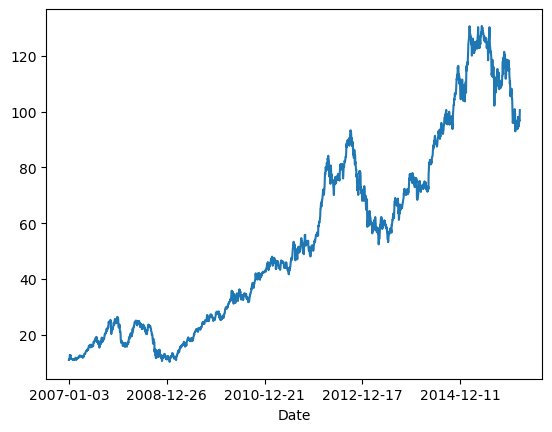

In [25]:
stock = stock.set_index('Date')
stock.AAPL.plot()


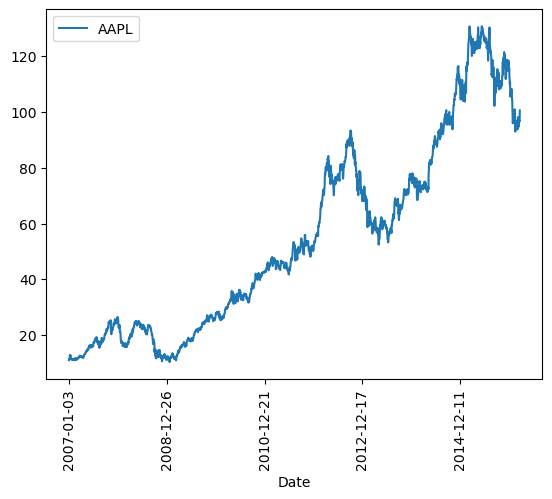

In [36]:
stock.plot(x = 'Date', y = 'AAPL')
plt.tick_params(axis='x', direction='out', labelrotation=90)
plt.show()

<Axes: xlabel='Date'>

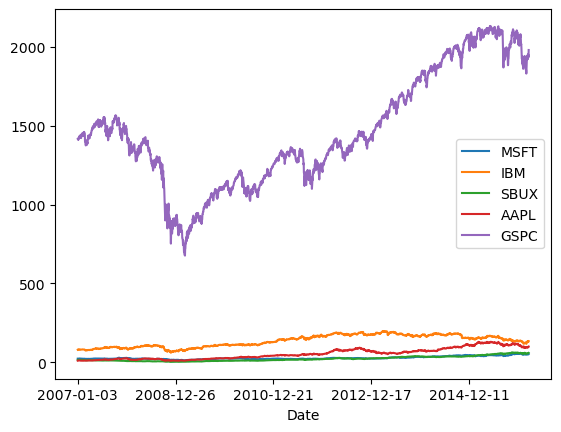

In [27]:
stock.plot()

In [32]:
stock_1213 = stock.loc['2012-01-01':'2013-12-01', :]

<Axes: xlabel='Date'>

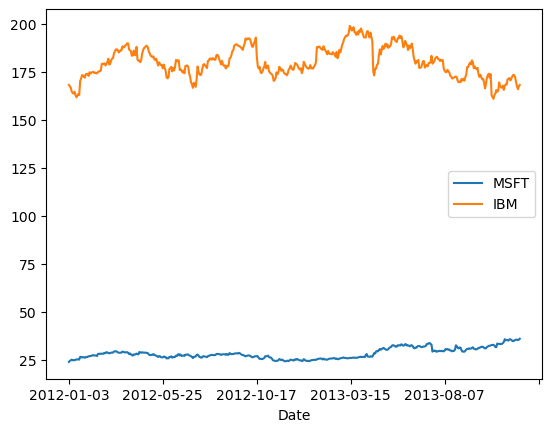

In [33]:
stock_1213.plot(y = ['MSFT', 'IBM'])

# Esercizio 

Scarichiamo il dataset metal_bands_2017.csv dalla piattaforma e: • Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo? • Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine (nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare .loc[:, "style"] e non .style perché quest'ultimo è un metodo) • Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche trend?

In [37]:
metal = pd.read_csv('metal_bands_2017.csv', encoding= 'latin1')
metal

# db ordinato in base al numero di fan del 2017

,id,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,United States of America,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,United States of America,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...,...
4995,4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


<Axes: ylabel='Frequency'>

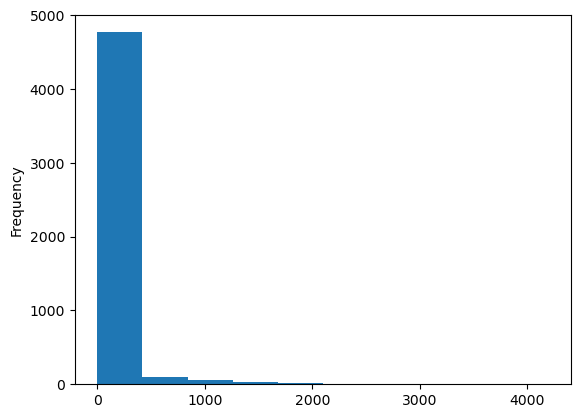

In [41]:
metal.fans.plot(kind = 'hist')

In [56]:
filtro_prog = metal['style'].str.contains('progressive', case= False)
filtro_thrash = metal['style'].str.contains('thrash', case= False)
filtro = filtro_prog & filtro_thrash

metal_pg = metal.loc[filtro]
k = metal_pg.groupby('origin')['fans'].sum()

<Axes: ylabel='origin'>

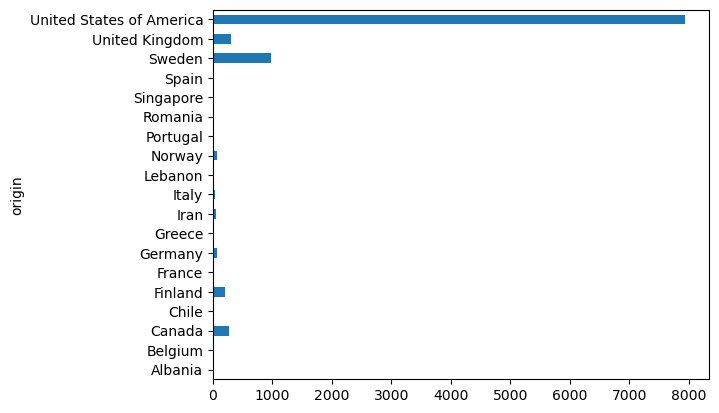

In [59]:
k.plot(kind = 'barh')

C:\Users\Utente\AppData\Local\Temp\ipykernel_13908\375301821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metal_fc.formed = metal_fc.formed.astype(int)


<Axes: ylabel='Frequency'>

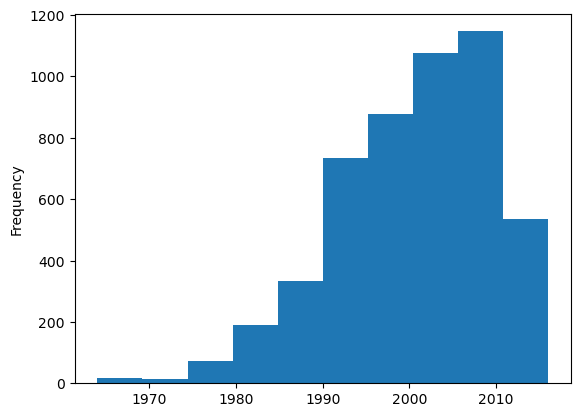

In [69]:
metal.formed.value_counts()
filtro = metal.formed != '-'
metal_fc = metal.loc[filtro]
metal_fc.formed = metal_fc.formed.astype(int)

metal_fc.formed.plot(kind= 'hist')

Esercizio Scarichiamo il dataset elections.csv da https://github.com/plotly/datasets/blob/master/election.csv : • Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti) • Con un grafico a barre confrontiamo il numero di votanti per i primi dieci distretti

In [103]:
election = pd.read_csv('election.csv')
election.set_index('district_id')
election
election.info()
election.Coderre.sum()
election

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   district     58 non-null     object
 1   Coderre      58 non-null     int64 
 2   Bergeron     58 non-null     int64 
 3   Joly         58 non-null     int64 
 4   total        58 non-null     int64 
 5   winner       58 non-null     object
 6   result       58 non-null     object
 7   district_id  58 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.8+ KB


,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


<Axes: >

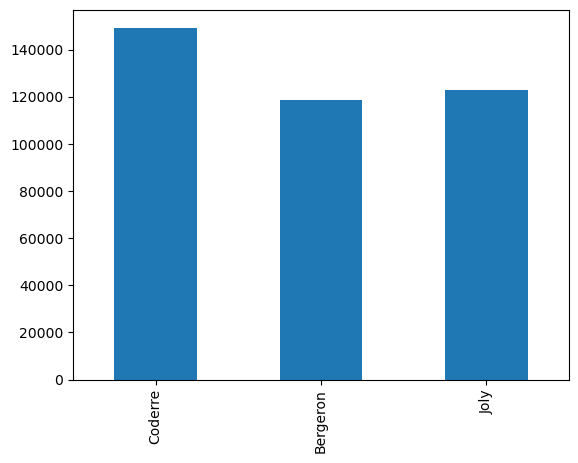

In [97]:
election.loc[:, 'Coderre':'Joly'].sum().plot( kind = 'bar')

In [108]:
election_t = election.transpose()
election_t.iloc[5, 0:11].plot(kind = 'bar')

TypeError: no numeric data to plot